# Notebook 3 xxxx

In [1]:
import pandas as pd 
from tqdm.auto import tqdm
from pathlib import Path
import pickle
import numpy  as np 
import matplotlib.pyplot as plt
import os

In [2]:
mouse = 'T240'
data_day = '2019_09_27__T240'
date = '2019_09_27'

HowManyBack = 1

Nb2= 'a'
Nb3='c'

data_dir_output = "/Users/gilmandelbaum/Desktop/outPut"

seq_str = "0a1b2a3c4ab5a6abc10a"

In [3]:
root = Path(data_dir_output+"/"+mouse+"/"+data_day+'/'+str(HowManyBack)+"_Back")
d = mouse+"_"+date+"Notebook_2_"+Nb2+'.pickle'
my_path = root / d 
# open a file, where you stored the pickled data
fileToOpen = open(my_path, 'rb')
# dump information to that file
aligned_behav_photo = pickle.load(fileToOpen)

In [4]:
aligned_behav_photo

,nTrial,iBlock,iTrial,iOccurrence,iState_start,iState_end,analog1,analog2,d2 R,d1 R,d2 L,d1 L,Real_nTrials
0,2.0,1.0,2.0,0.0,23.0,29.0,1133.0,2762.0,1119.735352,319.176697,893.665649,806.953247,2
1,2.0,1.0,2.0,1.0,29.0,32.0,1135.0,2749.0,1108.970825,319.213837,888.739807,807.190002,2
2,2.0,1.0,2.0,2.0,32.0,33.0,232.0,17.0,1111.546509,319.234650,889.879639,807.176025,2
3,2.0,1.0,2.0,3.0,33.0,33.0,233.0,18.0,1110.021973,319.260773,889.153442,807.238647,2
4,2.0,1.0,2.0,4.0,33.0,29.0,1134.0,2748.0,1111.105469,319.283600,889.611633,807.252380,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265423,270.0,35.0,11.0,850.0,21.0,14.0,1134.0,2757.0,1047.684692,295.827179,847.208679,737.572815,270
265424,270.0,35.0,11.0,851.0,14.0,24.0,233.0,16.0,1047.654175,295.835266,847.087097,737.589478,270
265425,270.0,35.0,11.0,852.0,24.0,25.0,234.0,17.0,1047.675293,295.819031,847.163086,737.632629,270
265426,270.0,35.0,11.0,853.0,25.0,27.0,1133.0,2758.0,1047.633179,295.828705,846.969177,737.632568,270


# Get df/f for photometry data based on sliding window

In [5]:
photometry_all_channel_afterDownSample = aligned_behav_photo[["d2 R","d1 R","d2 L","d1 L"]]

In [6]:
photometry_all_channel_afterDownSample_c = photometry_all_channel_afterDownSample.copy()
photometry_all_channel_afterDownSample_c.to_dict('list');

In [7]:
tstamps = list(range(len(photometry_all_channel_afterDownSample_c ["d2 R"])))

# sliding window normalize: 

In [8]:
baseline_win_samples = 24000

In [9]:
padded_data = pd.DataFrame()
padded_data["d2 R"] = np.pad(photometry_all_channel_afterDownSample_c["d2 R"], (baseline_win_samples // 2, baseline_win_samples // 2-1 ), 'edge')
padded_data["d1 R"] = np.pad(photometry_all_channel_afterDownSample_c["d1 R"], (baseline_win_samples // 2, baseline_win_samples // 2-1 ), 'edge')
padded_data["d2 L"] = np.pad(photometry_all_channel_afterDownSample_c["d2 L"], (baseline_win_samples // 2, baseline_win_samples // 2-1 ), 'edge')
padded_data["d1 L"] = np.pad(photometry_all_channel_afterDownSample_c["d1 L"], (baseline_win_samples // 2, baseline_win_samples // 2-1 ), 'edge')

In [10]:
padded_data

,d2 R,d1 R,d2 L,d1 L
0,1119.735352,319.176697,893.665649,806.953247
1,1119.735352,319.176697,893.665649,806.953247
2,1119.735352,319.176697,893.665649,806.953247
3,1119.735352,319.176697,893.665649,806.953247
4,1119.735352,319.176697,893.665649,806.953247
...,...,...,...,...
289422,1047.714355,295.790894,847.197998,737.692749
289423,1047.714355,295.790894,847.197998,737.692749
289424,1047.714355,295.790894,847.197998,737.692749
289425,1047.714355,295.790894,847.197998,737.692749


In [11]:
def normalize_1(x, window):
    r = x.rolling(window=window,center=True)
    result = (x-r.min())/(r.max()-r.min())
    return (result)

In [12]:
# def normalize_2(x, window):
#     r = x.rolling(window=window,center=True)
#     lower_percent = r.quantile(.01, interpolation='lower')
#     upper_percent = r.quantile(.99, interpolation='lower')
#     result = (x-lower_percent)/(upper_percent-lower_percent)
#     return (result)

In [13]:
%%time
padded_data_rolling = pd.DataFrame()
padded_data_rolling["d2 R_nor"] = normalize_1(padded_data["d2 R"],baseline_win_samples)
padded_data_rolling["d1 R_nor"] = normalize_1(padded_data["d1 R"],baseline_win_samples)
padded_data_rolling["d2 L_nor"] = normalize_1(padded_data["d2 L"],baseline_win_samples)
padded_data_rolling["d1 L_nor"] = normalize_1(padded_data["d1 L"],baseline_win_samples)

CPU times: user 286 ms, sys: 71.3 ms, total: 358 ms
Wall time: 311 ms


In [14]:
padded_data_rolling = padded_data_rolling.dropna()
padded_data_rolling = padded_data_rolling.reset_index(drop=True)

In [15]:
aligned_behav_photo_padded_data_rolling = aligned_behav_photo
aligned_behav_photo_padded_data_rolling["d2 R"] = padded_data_rolling["d2 R_nor"].values
aligned_behav_photo_padded_data_rolling["d1 R"] = padded_data_rolling["d1 R_nor"].values
aligned_behav_photo_padded_data_rolling["d2 L"] = padded_data_rolling["d2 L_nor"].values
aligned_behav_photo_padded_data_rolling["d1 L"] = padded_data_rolling["d1 L_nor"].values

In [16]:
processed_data = aligned_behav_photo_padded_data_rolling

In [17]:
def smoothing_function(session):
    #make the window 
    M = 50
    window = np.ones(M)
    window /= sum(window)
    
    session_smooth = session.copy()
    
    for channel_name in ["d2 R","d2 L"]:
        
        channel_data = session[channel_name]
        channel_data_padded = np.pad(channel_data,(M // 2, M // 2 - 1),'edge')
        session_smooth[channel_name] = np.convolve(channel_data_padded,window,mode='valid')
        
    return (session_smooth)

In [18]:
processed_data = smoothing_function(processed_data)

In [19]:
def smoothing_function(session):
    #make the window 
    M = 100
    window = np.ones(M)
    window /= sum(window)
    
    session_smooth = session.copy()
    
    for channel_name in ["d1 R","d1 L"]:
        
        channel_data = session[channel_name]
        channel_data_padded = np.pad(channel_data,(M // 2, M // 2 - 1),'edge')
        session_smooth[channel_name] = np.convolve(channel_data_padded,window,mode='valid')
        
    return (session_smooth)

In [20]:
processed_data = smoothing_function(processed_data)

# plot the data after the rolling z-score is applied: 

In [21]:
# stash result in a cache directory, for how many back. 
cache_dir_plt = os.path.join(data_dir_output+'/'+mouse+'/'+data_day, str(HowManyBack)+'_Back',"0.plots")
if not os.path.exists(cache_dir_plt):
    os.makedirs(cache_dir_plt)

In [22]:
path_to_plot = cache_dir_plt+"/"+seq_str[:seq_str.index("4")]+"_plot"

In [23]:
keys = ["d2 R","d1 R","d2 L","d1 L"]

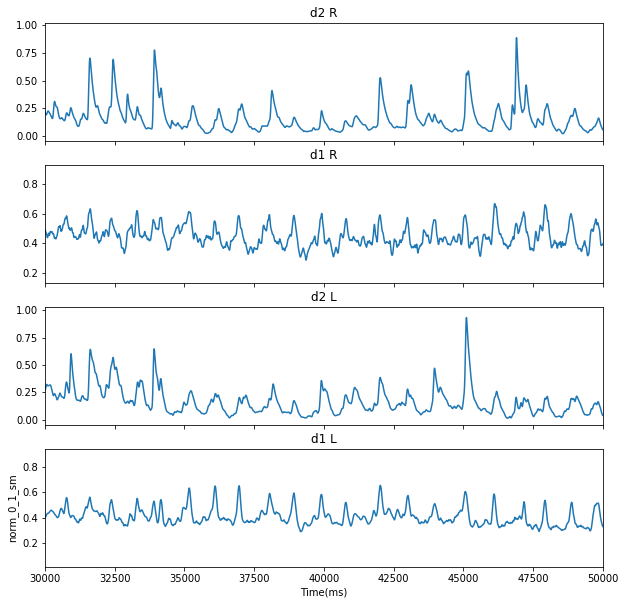

In [24]:
fig, ax = plt.subplots(4, 1,figsize=(10,10),sharex=True, sharey=False)

for _ax, k in zip(ax.flatten(), keys):
    _ax.plot(tstamps, processed_data[k])
    _ax.set_title(k.split('_')[0])
    
_ax.set_xlim(30000,50000)
_ax.set_xlabel('Time(ms)')
_ax.set_ylabel("norm_sm_win")
fig.savefig(path_to_plot+"_1"+'.pdf')
plt.show()

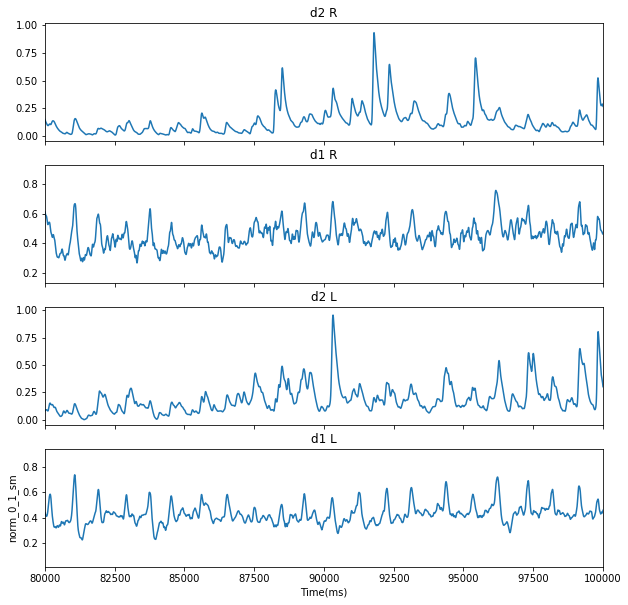

In [25]:
fig, ax = plt.subplots(4, 1,figsize=(10,10),sharex=True, sharey=False)

for _ax, k in zip(ax.flatten(), keys):
    _ax.plot(tstamps, processed_data[k])
    _ax.set_title(k.split('_')[0])
    
_ax.set_xlim(80000,100000)
_ax.set_xlabel('Time(ms)')
_ax.set_ylabel("norm_sm_win")
fig.savefig(path_to_plot+"_2"+'.pdf')
plt.show()

In [26]:
root = Path(data_dir_output+"/"+mouse+"/"+data_day+'/'+str(HowManyBack)+"_Back")
d = mouse+"_"+date+"Notebook_3_l"+'_seq'+seq_str[seq_str.index("2"):seq_str.index("4")]+'.pickle'
my_path = root / d 
my_file = open(my_path, 'wb')
my_file = pickle.dump(processed_data,my_file)